In [22]:
#!/usr/bin/python

"""
This script performs robustness analysis on the given network, 
which involves removing nodes from the network at random, or in reverse 
order of centrality measures (degree, betweenness, closeness, and 
eigenvector), and comparing the size of the largest component in the 
network to the fraction of nodes removed.

Usage: python robustness.py <infile> <outfile> <recalculate>

where infile is the name of the network file in gml format, outfile is the 
name of the output (pdf) file in which the results of the analysis is 
saved, and recalculate (True of False) specifies if the targeted attack is 
simultaneous (False), or sequential (True).
"""

import igraph, networkx, numpy, operator, pylab, random, sys

def betweenness(infile, recalculate = False):
    """
    Performs robustness analysis based on betweenness centrality,  
    on the network specified by infile using sequential (recalculate = True) 
    or simultaneous (recalculate = False) approach. Returns a list 
    with fraction of nodes removed, a list with the corresponding sizes of 
    the largest component of the network, and the overall vulnerability 
    of the network.
    """

    g = networkx.read_gml(infile, label='id')
    m = networkx.betweenness_centrality(g)
    l = sorted(m.items(), key = operator.itemgetter(1), reverse = True)
    x = []
    y = []
    largest_component = max(networkx.connected_components(g), key = len)
    n = len(g.nodes())
    x.append(0)
    y.append(len(largest_component) * 1. / n)
    R = 0.0
    for i in range(1, n):
        g.remove_node(l.pop(0)[0])
        if recalculate:
            m = networkx.betweenness_centrality(g)
            l = sorted(m.items(), key = operator.itemgetter(1), 
                       reverse = True)
        largest_component = max(networkx.connected_components(g), key = len)
        x.append(i * 1. / n)
        R += len(largest_component) * 1. / n
        y.append(len(largest_component) * 1. / n)
    return x, y, 0.5 - R / n

def betweenness_fracture(infile, outfile, fraction, recalculate = False):
    """
    Removes given fraction of nodes from infile network in reverse order of 
    betweenness centrality (with or without recalculation of centrality values 
    after each node removal) and saves the network in outfile.
    """

    g = networkx.read_gml(infile, label='id')
    m = networkx.betweenness_centrality(g)
    l = sorted(m.items(), key = operator.itemgetter(1), reverse = True)
    largest_component = max(networkx.connected_components(g), key = len)
    n = len(g.nodes())
    for i in range(1, n):
        g.remove_node(l.pop(0)[0])
        if recalculate:
            m = networkx.betweenness_centrality(g)
            l = sorted(m.items(), key = operator.itemgetter(1), 
                       reverse = True)
        largest_component = max(networkx.connected_components(g), key = len)
        if i * 1. / n >= fraction:
            break
    components = networkx.connected_components(g)
    component_id = 1
    for component in components:
        for node in component:
            g.node[node]["component"] = component_id
        component_id += 1
    networkx.write_gml(g, outfile)

def closeness(infile, recalculate = False):
    """
    Performs robustness analysis based on closeness centrality,  
    on the network specified by infile using sequential (recalculate = True) 
    or simultaneous (recalculate = False) approach. Returns a list 
    with fraction of nodes removed, a list with the corresponding sizes of 
    the largest component of the network, and the overall vulnerability 
    of the network.
    """

    g = networkx.read_gml(infile, label='id')
    m = networkx.closeness_centrality(g)
    l = sorted(m.items(), key = operator.itemgetter(1), reverse = True)
    x = []
    y = []
    largest_component = max(networkx.connected_components(g), key = len)
    n = len(g.nodes())
    x.append(0)
    y.append(len(largest_component) * 1. / n)
    R = 0.0
    for i in range(1, n):
        g.remove_node(l.pop(0)[0])
        if recalculate:
            m = networkx.closeness_centrality(g)
            l = sorted(m.items(), key = operator.itemgetter(1), 
                       reverse = True)
        largest_component = max(networkx.connected_components(g), key = len)
        x.append(i * 1. / n)
        R += len(largest_component) * 1. / n
        y.append(len(largest_component) * 1. / n)
    return x, y, 0.5 - R / n

def closeness_fracture(infile, outfile, fraction, recalculate = False):
    """
    Removes given fraction of nodes from infile network in reverse order of 
    closeness centrality (with or without recalculation of centrality values 
    after each node removal) and saves the network in outfile.
    """

    g = networkx.read_gml(infile, label='id')
    m = networkx.closeness_centrality(g)
    l = sorted(m.items(), key = operator.itemgetter(1), reverse = True)
    largest_component = max(networkx.connected_components(g), key = len)
    n = len(g.nodes())
    for i in range(1, n):
        g.remove_node(l.pop(0)[0])
        if recalculate:
            m = networkx.closeness_centrality(g)
            l = sorted(m.items(), key = operator.itemgetter(1), 
                       reverse = True)
        largest_component = max(networkx.connected_components(g), key = len)
        if i * 1. / n >= fraction:
            break
    components = networkx.connected_components(g)
    component_id = 1
    for component in components:
        for node in component:
            g.node[node]["component"] = component_id
        component_id += 1
    networkx.write_gml(g, outfile)

def degree(infile, recalculate = False):
    """
    Performs robustness analysis based on degree centrality,  
    on the network specified by infile using sequential (recalculate = True) 
    or simultaneous (recalculate = False) approach. Returns a list 
    with fraction of nodes removed, a list with the corresponding sizes of 
    the largest component of the network, and the overall vulnerability 
    of the network.
    """

    g = networkx.read_gml(infile, label='id')
    m = networkx.degree_centrality(g)
    l = sorted(m.items(), key = operator.itemgetter(1), reverse = True)
    x = []
    y = []
    largest_component = max(networkx.connected_components(g), key = len)
    n = len(g.nodes())
    x.append(0)
    y.append(len(largest_component) * 1. / n)
    R = 0.0
    for i in range(1, n - 1):
        g.remove_node(l.pop(0)[0])
        if recalculate:
            m = networkx.degree_centrality(g)
            l = sorted(m.items(), key = operator.itemgetter(1), 
                       reverse = True)
        largest_component = max(networkx.connected_components(g), key = len)
        x.append(i * 1. / n)
        R += len(largest_component) * 1. / n
        y.append(len(largest_component) * 1. / n)
    return x, y, 0.5 - R / n

def degree_fracture(infile, outfile, fraction, recalculate = False):
    """
    Removes given fraction of nodes from infile network in reverse order of 
    degree centrality (with or without recalculation of centrality values 
    after each node removal) and saves the network in outfile.
    """

    g = networkx.read_gml(infile, label='id')
    m = networkx.degree_centrality(g)
    l = sorted(m.items(), key = operator.itemgetter(1), reverse = True)
    largest_component = max(networkx.connected_components(g), key = len)
    n = len(g.nodes())
    for i in range(1, n - 1):
        g.remove_node(l.pop(0)[0])
        if recalculate:
            m = networkx.degree_centrality(g)
            l = sorted(m.items(), key = operator.itemgetter(1), 
                       reverse = True)
        largest_component = max(networkx.connected_components(g), key = len)
        if i * 1. / n >= fraction:
            break
    components = networkx.connected_components(g)
    component_id = 1
    for component in components:
        for node in component:
            g.node[node]["component"] = component_id
        component_id += 1
    networkx.write_gml(g, outfile)

def eigenvector(infile, recalculate = False):
    """
    Performs robustness analysis based on eigenvector centrality,  
    on the network specified by infile using sequential (recalculate = True) 
    or simultaneous (recalculate = False) approach. Returns a list 
    with fraction of nodes removed, a list with the corresponding sizes of 
    the largest component of the network, and the overall vulnerability 
    of the network.
    """

    def indexof(g, s):
        vs = g.vs()
        for i in range(0, len(vs)):
            v = vs[i]
            if v["label"] == s:
                return i
        return None

    g = igraph.Graph.Read_GML(infile)
    vs = g.vs()
    m = {}
    el = g.eigenvector_centrality()
    for i in range(0, len(vs)):
        m[vs[i]["label"]] = float(el[i])
    l = m.items()
    l = sorted(l, key = operator.itemgetter(1), reverse = True)
    x = []
    y = []
    largest_component = g.components().giant().vcount()
    n = g.vcount()
    x.append(0)
    y.append(largest_component * 1. / n)
    R = 0.0
    for i in range(1, n):
        g.delete_vertices(indexof(g, l.pop(0)[0]))
        if recalculate:
            m = {}
            el = g.eigenvector_centrality()
            for j in range(0, len(vs)):
                m[vs[j]["label"]] = float(el[j])
            l = m.items()
            l = sorted(l, key = operator.itemgetter(1), reverse = True)
        largest_component = g.components().giant().vcount()
        x.append(i * 1. / n)
        R += largest_component * 1. / n
        y.append(largest_component * 1. / n)
    return x, y, 0.5 - R / n

def eigenvector_fracture(infile, outfile, fraction, recalculate = False):
    """
    Removes given fraction of nodes from infile network in reverse order of 
    eigenvector centrality (with or without recalculation of centrality values 
    after each node removal) and saves the network in outfile.
    """

    def indexof(g, s):
        vs = g.vs()
        for i in range(0, len(vs)):
            v = vs[i]
            if v["label"] == s:
                return i
        return None

    g = igraph.Graph.Read_GML(infile)
    vs = g.vs()
    m = {}
    el = g.eigenvector_centrality()
    for i in range(0, len(vs)):
        m[vs[i]["label"]] = float(el[i])
    l = m.items()
    l = sorted(l, key = operator.itemgetter(1), reverse = True)
    
    largest_component = g.components().giant().vcount()
    n = g.vcount()
    for i in range(1, n):
        g.delete_vertices(indexof(g, l.pop(0)[0]))
        if recalculate:
            m = {}
            el = g.eigenvector_centrality()
            for j in range(0, len(vs)):
                m[vs[j]["label"]] = float(el[j])
            l = m.items()
            l = sorted(l, key = operator.itemgetter(1), reverse = True)
        largest_component = g.components().giant().vcount()
        if i * 1. / n >= fraction:
            break
    components = g.components()
    component_id = 1
    for component in components:
        for node in component:
            vs[node]["component"] = component_id
        component_id += 1
    g.write_gml(outfile)

def rand(infile):
    """
    Performs robustness analysis based on random attack, on the network 
    specified by infile. Returns a list with fraction of nodes removed, a 
    list with the corresponding sizes of the largest component of the 
    network, and the overall vulnerability of the network.
    """

    g = networkx.read_gml(infile, label='id')
    l = [(node, 0) for node in g.nodes()]
    random.shuffle(l)
    x = []
    y = []
    largest_component = max(networkx.connected_components(g), key = len)
    n = len(g.nodes())
    x.append(0)
    y.append(len(largest_component) * 1. / n)
    R = 0.0
    for i in range(1, n):
        g.remove_node(l.pop(0)[0])
        largest_component = max(networkx.connected_components(g), key = len)
        x.append(i * 1. / n)
        R += len(largest_component) * 1. / n
        y.append(len(largest_component) * 1. / n)
    return x, y, 0.5 - R / n

In [33]:

infile = "erg.gml"
outfile = "r_erg.pdf"
recalculate = False

#     if argv[2] == "True":
#         recalculate = True
#     else:
#         recalculate = False
x1, y1, VD = degree(infile, recalculate)

In [34]:
x2, y2, VB = betweenness(infile, recalculate)
x3, y3, VC = closeness(infile, recalculate)

In [35]:
x4, y4, VE = closeness(infile, recalculate) #eigenvector(infile, recalculate)

In [36]:
x5, y5, VR = rand(infile)

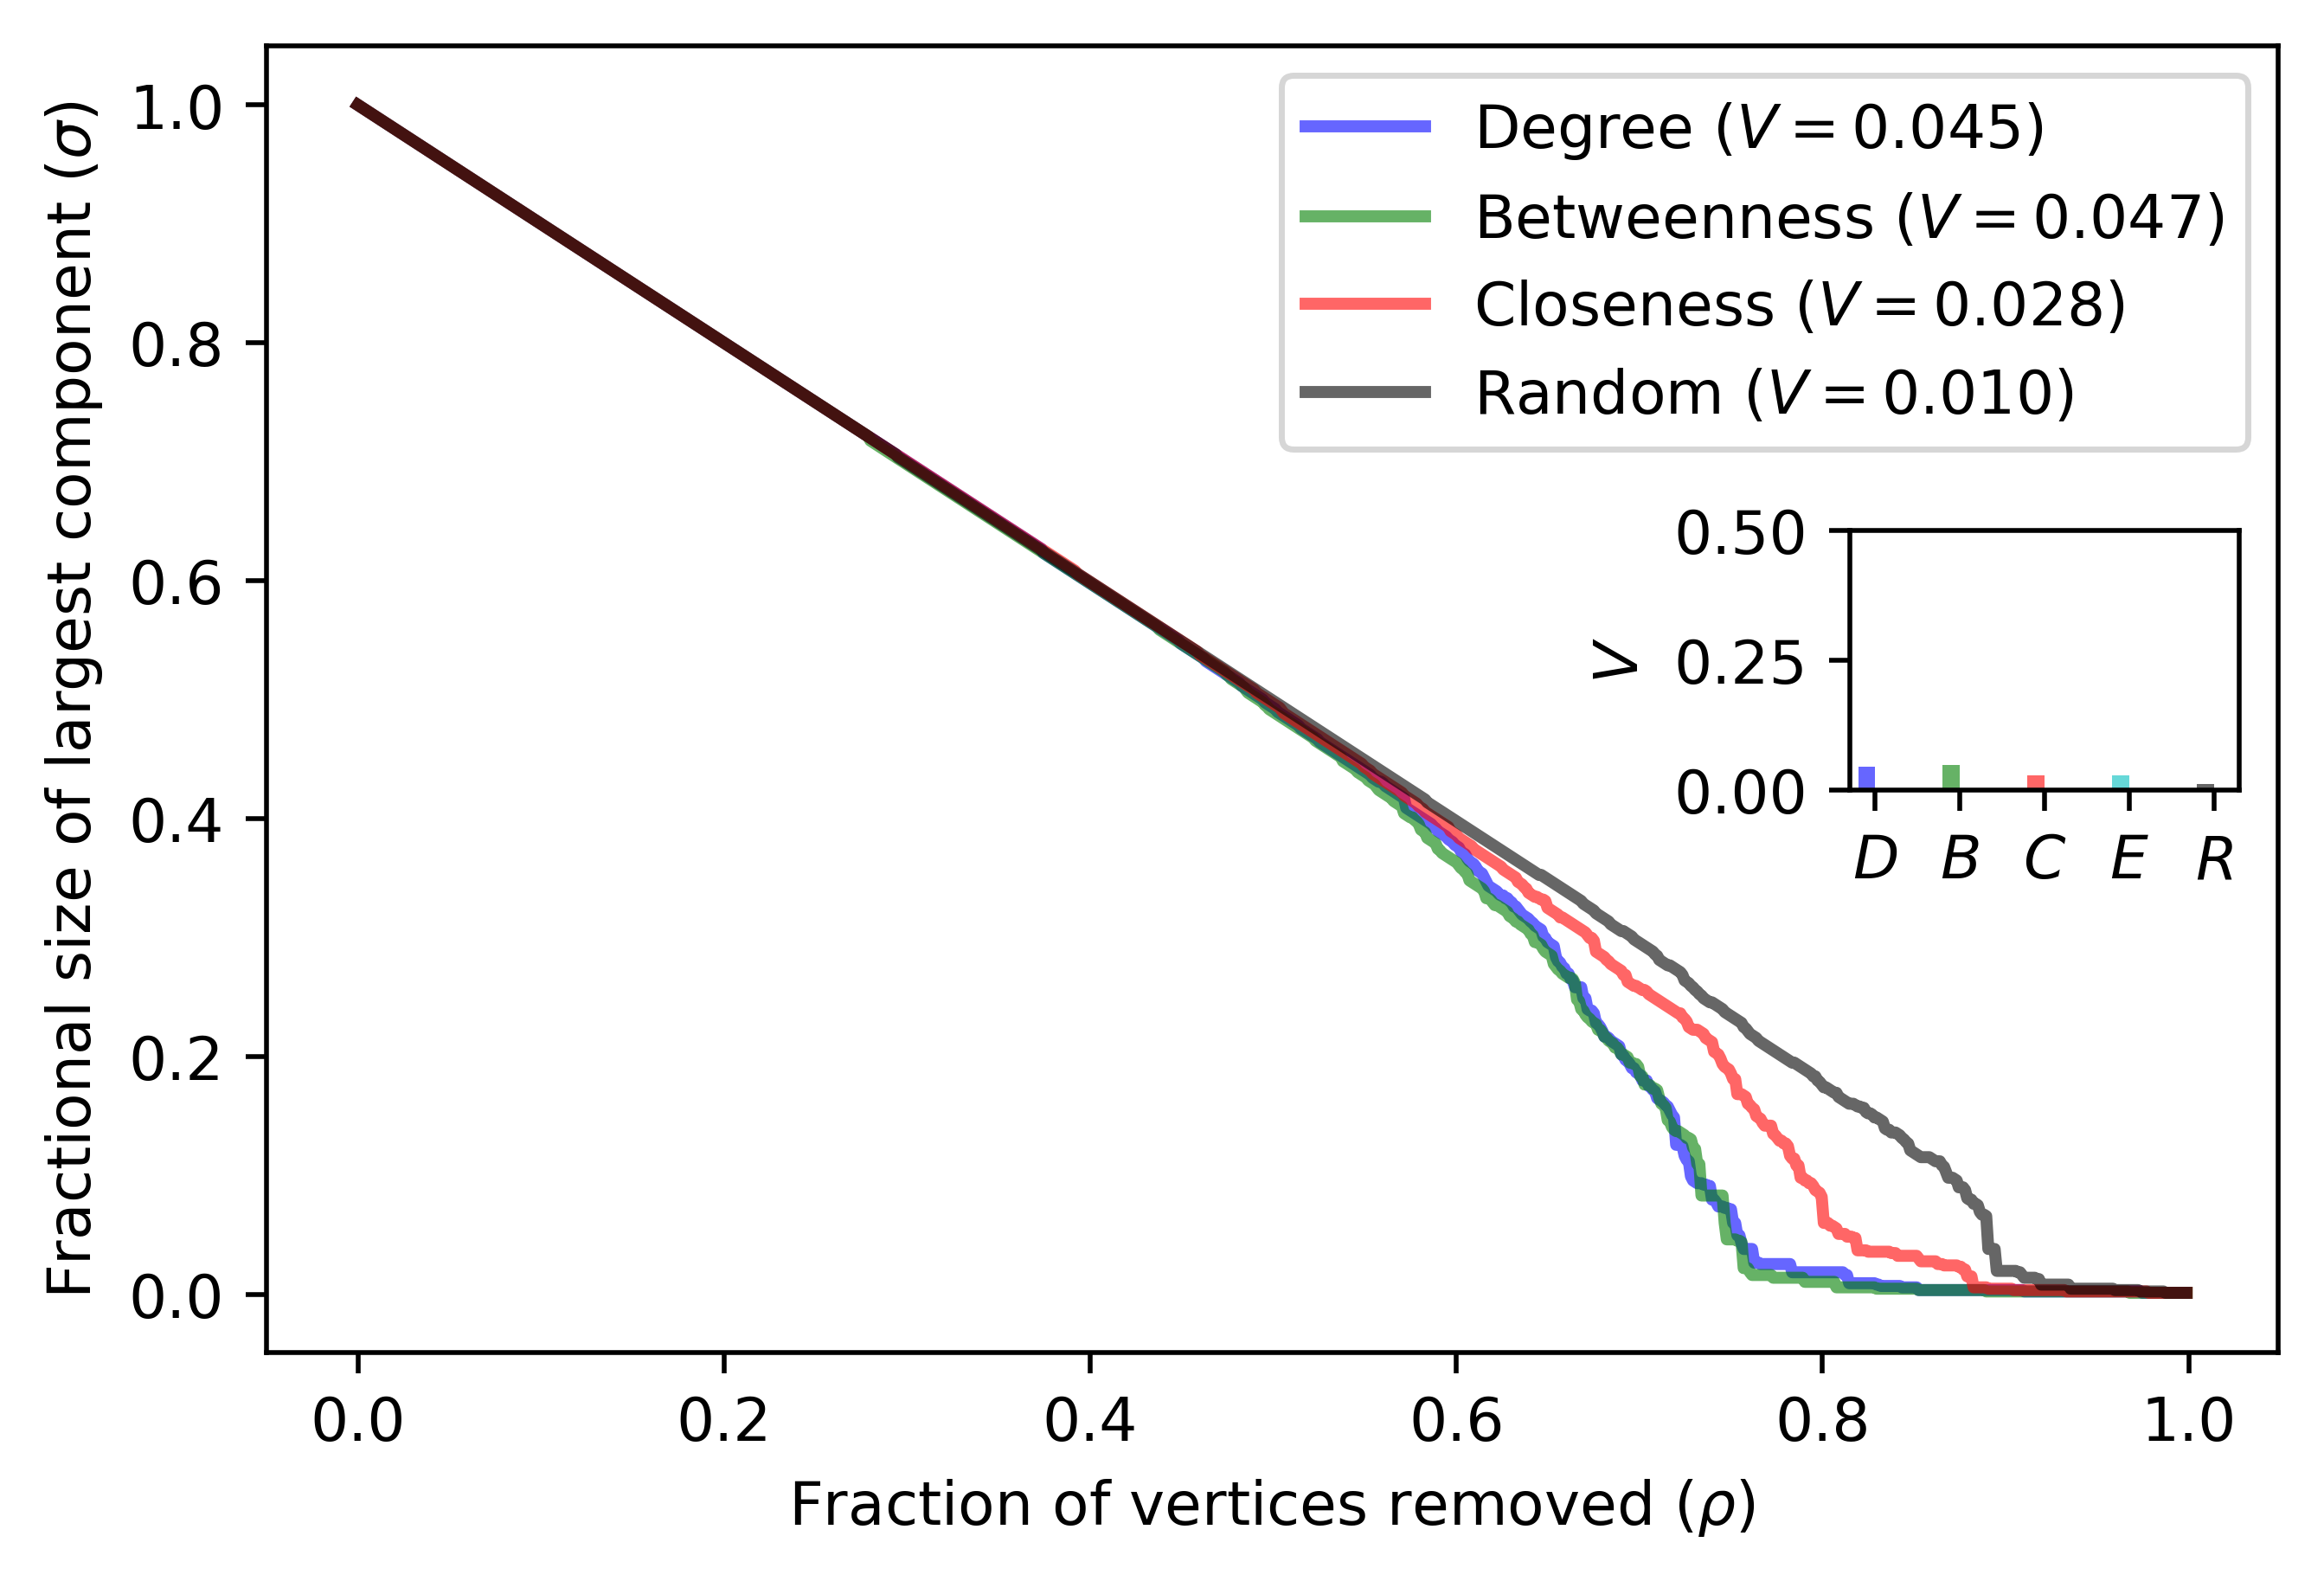

In [37]:
pylab.figure(2, dpi = 500)
pylab.xlabel(r"Fraction of vertices removed ($\rho$)")
pylab.ylabel(r"Fractional size of largest component ($\sigma$)")
pylab.plot(x1, y1, "b-", alpha = 0.6, linewidth = 2.0)
pylab.plot(x2, y2, "g-", alpha = 0.6, linewidth = 2.0)
pylab.plot(x3, y3, "r-", alpha = 0.6, linewidth = 2.0)
pylab.plot(x5, y5, "k-", alpha = 0.6, linewidth = 2.0)
pylab.legend((r"Degree ($V = %4.3f$)" %(VD), 
              "Betweenness ($V = %4.3f$)" %(VB), 
              "Closeness ($V = %4.3f$)" %(VC), 
              "Random ($V = %4.3f$)" %(VR)), 
             loc = "upper right", shadow = False)

# Inset showing vulnerability values.
labels = [r"$D$", r"$B$", r"$C$", r"$E$", r"$R$"]
V = [VD, VB, VC, VE, VR]
xlocations = numpy.array(range(len(V)))+0.2
width = 0.2
inset = pylab.axes([0.735, 0.45, 0.15, 0.15])
pylab.bar(xlocations, V, color = ["b", "g", "r", "c", "k"], 
          alpha = 0.6, width = width)
pylab.yticks([0.0, 0.25, 0.5])
pylab.xticks(xlocations + width / 2, labels)
pylab.xlim(0, xlocations[-1] + width * 2)
pylab.ylabel(r"$V$")

pylab.savefig(outfile, format = "pdf")
pylab.close(1)